**David Devadze**
**Artificial Inteligence (CS550)**

Title: **Homework №2**
<br>
Deadline: **6 May 2020**

Homework will be evaluated maximum by **6 points**.
Each problem is **one point**. 

<h3 align="center">Problem 1: Probability Distributions</h3>

Consider the following probability distributions (choose the number that corresponds to your number in the student's list):
0. uniform
1. bernoulli distribution
2. binomial distribution
3. geometric distribution
4. hypergeometric distribution
5. poisson
6. beta
7. gamma
8. students
9. chi_squared
11. Gaussian distribution

Perform the following tasks:
- define the **distribution function**
- choose the **definition area** of the distribution function
- **generate 1000 events** with chosen distribution function
- add **Gaussian noise**
- choose the **binning** and plot the **histogramm **(do not forget to normalize it)
- **fit** the resulting histogram with the true distribution function, **identify errors**
- make a **final graph** showing: the resulting histogram, the true distribution and the results of fitting with the identified errors

**Note**: In the case of **discrete** and **continuouse** distributions, **do both**!

**Note**: Do not forget to **include** the **labels and units**!

**Hint**: You can use this source:

https://www.boost.org/doc/libs/1_58_0/libs/math/doc/html/math_toolkit/dist_ref/dists/

$$f(1)=p$$
$$f(0)=1-p$$
$$x\in \left[-1,2\right]$$

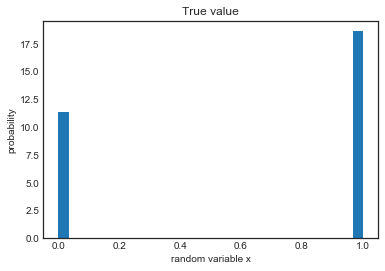

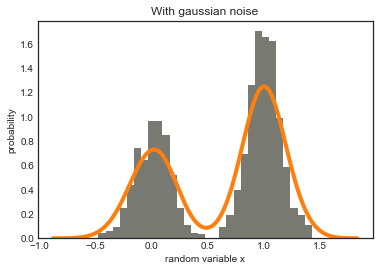

In [132]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw = bernoulli.rvs(size=1000,p=0.65)
noise = np.random.normal(0, 0.15, size = [1000])

data = raw + noise

plt.hist(raw, bins=30,density=True);
plt.xlabel('random variable x')
plt.ylabel('probability')
plt.title('True value')
plt.show()

plt.hist(data, bins=30, density=True)
plt.xlabel('random variable x')
plt.ylabel('probability')
plt.title('With gaussian noise')
sns.distplot(data, hist=True, kde=True, 
             bins=30,
             kde_kws={'linewidth': 4})
plt.show()



<h3 align="center">Problem 2: Bias of an Estimator</h3>

Suppose $X_1, X_2, ..., X_n$ are **independent and identically distributed** (**i.i.d.**) random variables with 
**expectation** $\mu$ and **variance** $\sigma^2$.

The **sample mean** and **uncorrected sample variance** are defined as:

$$\overline{X} = \frac{1}{n}\sum_{i=1}^{n} X_i \text{ and } S^2 = \frac{1}{n}\sum_{i=1}^{n} \left ( X_i - \overline{X} \right )^2.$$

(a) Compute the **sample mean** and compare it with the **population mean** $\mu$.

(b) Compute the **expected value** of the **uncorrected sample variance**, $\mathbf{E}[S^2]$, and compare it with the **population variance** $\sigma^2$.

(c) How to **change** the **sample variance** to get **unbiased estimator** of the **population variance** $\sigma^2$.

**Note**: the **expectation value** and the **sample mean** are different things!


(a)
$$
E\left(\frac{1}{n}\cdot \sum _{i=1}^nX_i\:\right)=\frac{1}{n}\cdot E\left(\:\sum \:\:\:_{i=1}^nX_i\right)=\frac{1}{n}\cdot \sum \:_{i=1}^nE\left(X_i\right)=\frac{1}{n}\cdot \sum \:_{i=1}^n\mu =\frac{1}{n}\cdot n\mu =\mu 
$$

(b)
$$
E\left[S^2\right]=E\left(\frac{1}{n}\cdot \:\sum \:_{i=1}^n\left(X_i-\overline{X}\right)^2\:\right)=E\left(\frac{1}{n}\cdot \:\:\sum \:\:_{i=1}^n\left(\left(X_i-\mu \right)-\left(\overline{X}-\mu \right)\right)^2\:\right)=E\left(\frac{1}{n}\cdot \:\:\:\sum \:\:\:_{i=1}^n\left(\left(X_i-\mu \:\right)^2-2\left(X_i-\mu \:\right)\left(\overline{X}-\mu \:\right)+\left(\overline{X}-\mu \:\right)^2\right)\:\right)=E\left[\frac{1}{n}\sum _{i=1}^n\left(X_i-\mu \right)^2-\frac{2}{n}\left(\overline{X}-\mu \right)\sum \:_{i=1}^n\left(X_i-\mu \right)+\frac{1}{n}\cdot n\left(\overline{X}-\mu \:\right)^2\:\right]=E\left[\frac{1}{n}\sum _{i=1}^n\left(X_i-\mu \right)^2-\frac{2}{n}\left(\overline{X}-\mu \right)\sum \:_{i=1}^n\left(X_i-\mu \right)+\left(\overline{X}-\mu \:\right)^2\:\right]
$$
$$
\overline{X} =\frac{1}{n}\sum_{i=1}^{n} X_i
$$
$$
\overline{X}-\mu =\frac{1}{n}\sum_{i=1}^{n} (X_i-\mu)
$$
$$
E\left[\frac{1}{n}\sum _{i=1}^n\left(X_i-\mu \right)^2-\frac{2}{n}\left(\overline{X}-\mu \right)\sum \:_{i=1}^n\left(X_i-\mu \right)+\left(\overline{X}-\mu \:\right)^2\:\right]=
E\left[\frac{1}{n}\sum _{i=1}^n\left(X_i-\mu \right)^2-\frac{2}{n}\left(\overline{X}-\mu \right)\cdot n\cdot \left(\overline{X}-\mu \:\right)+\frac{1}{n}\cdot n\left(\overline{X}-\mu \:\right)^2\:\right]=E\left[\frac{1}{n}\sum _{i=1}^n\left(X_i-\mu \right)^2-\left(\overline{X}-\mu \:\right)^2\:\right]=E\left[\:\frac{1}{n}\sum \:_{i=1}^n\left(X_i-\mu \:\right)^2\right]-E\left[\left(\overline{X}-\mu \:\:\right)^2\right]=\frac{n-1}{\:n}\sigma ^2
$$

(c)
In general for unbiased estimation instead of 1/n, 1/(n-1) is taken.
$$
E\left(\frac{1}{n-1}\cdot \:\sum \:_{i=1}^n\left(X_i-\overline{X}\right)^2\:\right)
$$
Which is equal to
$$
\frac{n}{n-1}\cdot E\left(\frac{1}{n}\cdot \:\sum \:_{i=1}^n\left(X_i-\overline{X}\right)^2\:\right)
$$
$$
\frac{n}{n-1}\cdot \frac{n-1}{\:n}\sigma ^2 = \sigma ^2
$$

<h3 align="center">Problem 3: Correlation Table</h3>

Given a **correlation table** of a random vector $(X,Y)$:

| X\Y |  -6  |  0  |   3  |
|:---:|:----:|:---:|:----:|
|  -2 |  0.1 |  0  |  0.2 |
|  0  | 0.05 |  a  |   0  |
|  1  |   0  | 0.2 | 0.05 |
|  7  |  0.1 |  0  |  0.1 |


(a) Find the **value** of the missing entry $a$;

(b) Find the **distribution** of a random variable $X$, i.e. $\operatorname{P}(X = x_i)$;

(c) Find the **expectation** and **variance** of a random variable $X$, i.e. $\operatorname{E}[X]$ and $\operatorname{Var}[X]$;

(d) Find the **distribution** of a random variable $Y$, i.e. $\operatorname{P}(Y = y_i)$;

(e) Find the **expectation** and **variance** of a random variable $Y$, i.e. $\operatorname{E}[Y]$ and $\operatorname{Var}[Y]$;

(f) Find the **covariance** of the random variables $X$ and $Y$, i.e. $\operatorname{Cov}(X, Y)$;

(g) Find the **сorrelation сoefficient** of the random variables $X$ and $Y$, i.e. $\rho(X, Y)$.

(a)
$$
0.1 + 0 + 0.2 + 0.05 + a + 0 + 0 + 0.2 + 0.05 + 0.1 + 0 + 0.1 = 1
$$
$$
a = 0.2
$$
(b)
$$
P(-2) = 0.1 + 0 + 0.2 = 0.3
$$
$$
P(0) = 0.05 + 0.2 + 0 = 0.25
$$
$$
P(1) = 0 + 0.2 + 0.05 = 0.25
$$
$$
P(7) = 0.1 + 0 + 0.1 = 0.2
$$
(c)
$$
E[X] = -2 \cdot 0.3 + 0 \cdot 0.25 + 1 \cdot 0.25 + 7 \cdot 0.2 = 1.05
$$
$$
Var[X] = E[X^2] - E[X]^2 = -2^2 \cdot 0.3 + 0^2 \cdot 0.25 + 1^2 \cdot 0.25 + 7^2 \cdot 0.2  - 1.05^2 = 10.148
$$
(d)
$$
P(-6) = 0.1 + 0.05 + 0 + 0.1 = 0.25
$$
$$
P(0) = 0 + 0.2 + 0.2 + 0 = 0.4
$$
$$
P(3) = 0.2 + 0 + 0.05 + 0.1 = 0.35
$$
(e)
$$
E[Y] = -6 \cdot 0.25 + 0 \cdot 0.4 + 3 \cdot 0.35 = -0.45
$$
$$
Var[Y] = E[Y^2] - E[Y]^2 = 6^2 \cdot 0.25 + 0^2 \cdot 0.4 + 3^2 \cdot 0.35 - 0.45^2 = 11.948
$$
(f)
$$
Cov(X, Y) = E[XY] - E[X]E[Y]
$$
$$
E[XY] = \sum _{b=1}^3\sum _{a=1}^3x_a\cdot y_b\cdot \left(x_a,\:y_b\right) = 
(-2) \cdot (-6) \cdot 0.1 + (-2) \cdot 0 \cdot 0 + (-2) \cdot 3 \cdot 0.2 +
0 \cdot (-6) \cdot 0.5 + 0 \cdot 0 \cdot 0.2 + 0 \cdot 3 \cdot 0 +
1 \cdot (-6) \cdot 0 + 1 \cdot 0 \cdot 0.2 + 1 \cdot 3 \cdot 0.05 +
7 \cdot -6 \cdot 0.1 + 7 \cdot 0 \cdot 0 + 7 \cdot 3 \cdot 0.1 
= 
-1.95
$$
$$Cov(X, Y) = -1.95 - 1.05 \cdot (-0.45) = -1.478$$
(g)
$$
\rho(X, Y) = \frac {Cov(X, Y)} { \sqrt { Var[X] \cdot Var[Y] }} = -0.134
$$

<h3 align="center">Problem 4: Naive Bayes Algorithm</h3>

Lets consider a dataset of a Car Showroom:

| Car № |        Maker        |  Type  | Color | Sell |
|:-----:|:-------------------:|:------:|:-----:|:----:|
|   1   | TATA Motors Limited | Sports |  Red  |  Yes |
|   2   |  FORD Motor Company | Sports | Black |  Yes |
|   3   | TATA Motors Limited |   Suv  |  Red  |  No  |
|   4   |  FORD Motor Company |   Suv  |  Red  |  No  |
|   5   | TATA Motors Limited | Sports | Black |  Yes |
|   6   |  FORD Motor Company | Sports | Black |  No  |
|   7   | TATA Motors Limited |   Suv  |  Red  |  No  |
|   8   | TATA Motors Limited |   Suv  |  Red  |  Yes |
|   9   |  FORD Motor Company |   Suv  | Black |  No  |
|   10  |  FORD Motor Company |   Suv  | Black |  Yes |

1. Suppose that we have a **black sports** car manufactured by **TATA Motors**, what is the probability of selling it?

2. Write a Python code that receives the **car parameter as input** and gives the **probability of selling the car as output**.

1.

{A}: { Sell = Yes }

{B_1}: { Maker = TATA }

{B_2}: { Type = Sports }

{B_3}: { Color = Black }

$$
P(A|B) = \frac {P(B_1|A) P(B_2|A) P(B_3|A) P(A)} {P(B_1|A) P(B_2|A) P(B_3|A) P(A) + P(B_1|\overline{A}) P(B_2|\overline{A}) P(B_3|\overline{A}) P(\overline{A})} =
\frac {\frac{3}{5} \frac{3}{4} \frac{3}{5} \frac{1}{2}} {\frac{3}{5} \frac{3}{4} \frac{3}{5} \frac{1}{2} + \frac{2}{5} \frac{1}{4} \frac{2}{5} \frac{1}{2}} =
\frac {\frac{27}{200}} {\frac{27}{200} + \frac{4}{200}} = \frac{27}{31}
$$

**2.**

In [2]:
data = [{'maker':'TATA','type':'Sports','color':'Red','sell':'Yes'},
        {'maker':'FORD','type':'Sports','color':'Black','sell':'Yes'},
        {'maker':'TATA','type':'Suv','color':'Red','sell':'No'},
        {'maker':'FORD','type':'Suv','color':'Red','sell':'No'},
        {'maker':'TATA','type':'Sports','color':'Black','sell':'Yes'},
        {'maker':'FORD','type':'Sports','color':'Black','sell':'No'},
        {'maker':'TATA','type':'Suv','color':'Red','sell':'No'},
        {'maker':'TATA','type':'Suv','color':'Red','sell':'Yes'},
        {'maker':'FORD','type':'Suv','color':'Black','sell':'No'},
        {'maker':'FORD','type':'Suv','color':'Black','sell':'Yes'}]
def _p(data,key='sell',value='Yes'):
    count = 0;
    for a in data:
        if a[key] == value:
            count = count + 1
    return count/len(data)
def _p1(data, key,value,key1 = 'sell',value1='Yes',inverse=False):
    count = 0
    count1 = 0
    for a in data:
        if a[key] == value:
            count = count + 1
            if inverse:
                if a[key1] != value1:
                    count1 = count1 + 1 
            else:
                if a[key1] == value1:
                    count1 = count1 + 1 
    return count1/count
def calc(data,row):
    return (_p1(data,'maker',row['maker'])*_p1(data,'type',row['type'])*_p1(data,'color',row['color'])*_p(data))/(_p1(data,'maker',row['maker'])*_p1(data,'type',row['type'])*_p1(data,'color',row['color'])*_p(data)+_p1(data,'maker',row['maker'],inverse=True)*_p1(data,'type',row['type'],inverse=True)*_p1(data,'color',row['color'],inverse=True)*_p(data,value='No'))

calc(data,{'maker':'TATA','type':'Sports','color':'Black'})

0.8709677419354839

<h3 align="center">Problem 5: Gradient Descent Method</h3>

Given a function of two variables: 
$$f(x,y) = x^2 + 2y^2 + e^{x+y}.$$

Find the minimum of this function using the gradient descent method.
For initial data, take the following conditions:
- starting point: $(0,0)$;
- step size multiplier: $0.1$;
- precision (absolute value of gradient): $0.05$.

How many iterations are necessary to obtain the required precision? (write python code).

In [134]:
import numpy as np

def f(x,y):
    return x**2 + 2*y**2 + np.exp(x+y)
def gra(x,y,n):
    dx = 2*x + np.exp(x + y)
    dy = 4*y + np.exp(x + y)
    p = pr(dx,dy)
    return x-n*dx, y-n*dy, p
def pr(x,y):
    return np.sqrt(x**2+y**2)

def calc(x,y,n,p):
    count = 1
    x,y,pr = gra(x,y,n)
    while p < pr and count<100:
        x,y,pr = gra(x,y,n)
        count=count+1
    return f(x,y),count
value, steps = calc(0,0,0.1,0.05)
print('value ',value, ' in ',steps,' steps')


value  0.7725343258658006  in  10  steps


<h3 align="center">Problem 6: Automatic Differentiation</h3>

Consider the function: $$z(x, y) = \sin{\left( x^2y + xy^2\right )}.$$

1. Build a **computation grap** and calculate the values for each node, propagating from the bottom (the input variables) to the top (the output function) at point $A = (1, 1)$.

2. Consider the seed values $\dot{w}_1 = \frac{\partial w_1}{\partial x} = 1$ and $\dot{w}_2 = \frac{\partial w_2}{\partial x} = 1$, and calculate the partial derivatives of each connection between operations, represented by the edges, i.e. $\dot{w}_i = \frac{\partial w_i}{\partial x}$.

3. Calculate the partial derivative $\frac{\partial z}{\partial x}$ at point $A = (1, 1)$ using the **forward accumulation**.

4. Consider the seed values $\bar{w}_n = \frac{\partial z}{\partial w_n} = 1$ and calculate the subexpresion varibales $\bar{w}_i$ for each connection between operations, i.e. $\bar{w}_i = \frac{\partial z}{\partial w_i}$.

5. Calculate the partial derivative $\frac{\partial z}{\partial y}$ at point $A = (1, 1)$ using the **reverse accumulation**.

1.
<img src="n6.png" style = "width:400px"/> 

$$
w_1 = x; w_2 = y;
$$
$$
x = 1; y = 1;
$$
$$
w_1 = 1;
$$
$$
w_2 = 1;
$$
$$
w_3 = w_1^2 = 1;
$$
$$
w_4 = w_2 ^ 2 = 1
$$
$$
w_5 = w_3 \cdot w_2 = 1;
$$
$$
w_6 = w_1 \cdot w_4 = 1
$$
$$
w_7 = w_5 + w_6 = 2;
$$
$$
w_8 = sin(w_7) = sin(2)
$$

2.

$$
\frac{d}{dw_1}\left(w_6\right)=\frac{d}{dw_1}\left(w_1\cdot w_4\right)=w_4=w_2^2
$$
$$
\frac{d}{dw_1}\left(w_3\right)=\frac{d}{dw_1}\left(w_1^2\right)=2w_1
$$
$$
\frac{d}{dw_3}\left(w_5\right)=\frac{d}{dw_3}\left(w_3\cdot w_2\right)=w_2
$$
$$
\frac{d}{dw_7}\left(w_8\right)=\frac{d}{dw_7}\left(sin\left(w_7\right)\right)=cos\left(w_7\right)
$$
$$
\frac{d}{dw_8}\left(z\right)=cos\left(w_7\right)\left(2w_1w_2+w_2\right)
$$

3.
$$
\frac{d}{dw_8}\left(z\right)=cos\left(2\right)\left(2+1\right) = 3cos(2)
$$

4.
$$
\frac{d}{dw_7}\left(w_8\right)=\frac{d}{dw_7}\left(sin\left(w_7\right)\right)=cos\left(w_7\right)
$$
$$
\frac{d}{dw_3}\left(w_5\right)=\frac{d}{dw_3}\left(w_3\cdot w_2\right)\cdot cos\left(w_7\right)=w_2\cdot cos\left(w_7\right)
$$
$$
\frac{d}{dw_1}\left(w_3\right)=\frac{d}{dw_1}\left(w_1^2\right)\cdot w_2\cdot \:cos\left(w_7\right)=2w_1w_2\cdot \:cos\left(w_7\right)
$$
$$
\frac{d}{dw_1}\left(w_6\right)=\frac{d}{dw_1}\left(w_1w_4\right)\:cos\left(w_7\right)=w_4\cdot \:cos\left(w_7\right)=w_2^2\cdot \:\:cos\left(w_7\right)
$$
$$
\frac{d}{dw_8}\left(z\right)=2w_1w_2\cdot \:cos\left(w_7\right)+w_2^2\cdot \:\:cos\left(w_7\right)
$$

5.
$$
\frac{d}{dw_8}\left(z\right)=2 \cdot cos(2) + cos(2) = 3 \cdot cos(2)
$$